In [34]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [35]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [36]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [37]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
month_str="06"
June_temp=session.query(Measurement.tobs).filter(func.strftime("%m",Measurement.date) == month_str).all()

#currently output is a list of tuples

In [38]:
#  3. Convert the June temperatures to a list.
June_temp_list = list(np.ravel(June_temp))

In [39]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
June_df=pd.DataFrame(June_temp_list,columns=['June Temps'])

In [40]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
June_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [41]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
month_str="12"
Dec_temp=session.query(Measurement.tobs).filter(func.strftime("%m",Measurement.date) == month_str).all()

#currently output is a list of tuples

In [42]:
# 7. Convert the December temperatures to a list.
Dec_temp_list = list(np.ravel(Dec_temp))

In [43]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
Dec_df=pd.DataFrame(Dec_temp_list,columns=['December Temps'])

In [44]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
Dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [45]:
## Additional Queries for December and June

In [46]:
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
month_str="06"
June_prcp=session.query(Measurement.prcp).filter(func.strftime("%m",Measurement.date) == month_str).all()
#currently output is a list of tuples
#  3. Convert the June temperatures to a list.
June_prcp_list = list(np.ravel(June_prcp))
# 4. Create a DataFrame from the list of prcp for the month of June. 
June_df_prcp=pd.DataFrame(June_prcp_list,columns=['June Precipitation'])
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
June_df_prcp.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [47]:
month_str="12"
Dec_prcp=session.query(Measurement.prcp).filter(func.strftime("%m",Measurement.date) == month_str).all()
#currently output is a list of tuples
#  3. Convert the June temperatures to a list.
Dec_prcp_list = list(np.ravel(Dec_prcp))
# 4. Create a DataFrame from the list of prcp for the month of June. 
Dec_df_prcp=pd.DataFrame(Dec_prcp_list,columns=['Dec Precipitation'])
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
Dec_df_prcp.describe()

,Dec Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [48]:
June_prcp_list

[0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.07,
 0.0,
 0.56,
 0.89,
 0.0,
 0.0,
 0.0,
 0.03,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05,
 0.06,
 0.07,
 None,
 0.0,
 0.0,
 0.01,
 0.01,
 0.0,
 0.02,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 None,
 None,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03,
 0.15,
 0.01,
 0.0,
 0.05,
 0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.37,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.04,
 0.12,
 0.04,
 0.02,
 0.35,
 0.03,
 0.01,
 0.0,
 0.0,
 0.03,
 0.01,
 0.0,
 0.66,
 0.01,
 0.0,
 0.0,
 0.0,
 0.03,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.03,
 0.15,
 0.01,
 0.07,
 0.01,
 0.01,
 0.19,
 0.0,
 0.05,
 0.06,
 0.04,
 0.0,
 0.01,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.

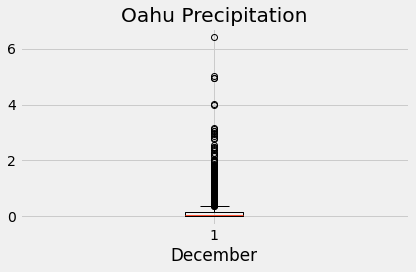

In [69]:
fig, ax = plt.subplots()

Not_none_values = filter(None.__ne__, Dec_prcp_list)
Dec_prcp_list_new=list(Not_none_values)
Dec_prcp_list_new

#matplotlib.pyplot.boxplot(Dec_prcp_list_new, vert=False)

ax.boxplot(Dec_prcp_list_new)
ax.set_title('Oahu Precipitation')
ax.set_xlabel('December')
fig.tight_layout()
plt.show()

#boxplot=Dec_df_prcp.boxplot(column=['Dec Precipitation'])

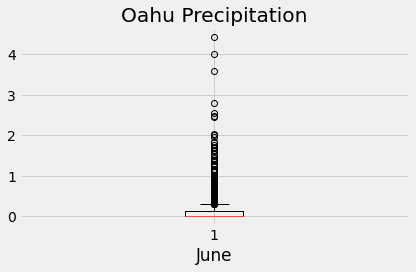

In [70]:
fig, ax = plt.subplots()

Not_none_values = filter(None.__ne__, June_prcp_list)
June_prcp_list_new=list(Not_none_values)
June_prcp_list_new

#matplotlib.pyplot.boxplot(Dec_prcp_list_new, vert=False)

ax.boxplot(June_prcp_list_new)
ax.set_title('Oahu Precipitation')
ax.set_xlabel('June')
fig.tight_layout()
plt.show()


#boxplot=June_df_prcp.boxplot(column=['June Precipitation'])

In [62]:
# Not_none_values = filter(None.__ne__, Dec_prcp_list)
# Dec_prcp_list_new=list(Not_none_values)
# Dec_prcp_list_new

In [63]:
# matplotlib.pyplot.boxplot(Dec_prcp_list_new, vert=False)